<a href="https://colab.research.google.com/github/FIRDAYUNITASARI/Fuzzy-C-Means/blob/main/FUZZY_C_MEANS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INSTAL PACKAGE**

In [ ]:
!pip install scikit-fuzzy

**MEMBACA DATA**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data ='/content/drive/MyDrive/sawah.csv'
data = pd.read_csv(data)
data

Mounted at /content/drive


,Provinsi,Tahun 2004,Tahun 2005,Tahun 2006,Tahun 2007,Tahun 2008,Tahun 2009,Tahun 2010,Tahun 2011,Tahun 2012,Tahun 2013
0,ACEH,346305.0,356649.0,315277.0,312803.0,323010.0,359751.0,313649.0,307556.0,308973.0,300808
1,SUMATERA UTARA,502839.0,462767.0,460486.0,453372.0,478521.0,464256.0,468724.0,467138.0,448722.0,438346
2,SUMATERA BARAT,231939.0,228176.0,229469.0,227355.0,225623.0,228176.0,229693.0,231463.0,230775.0,224182
3,RIAU,125966.0,118955.0,124985.0,128242.0,122255.0,122738.0,115961.0,115897.0,109585.0,93338
4,JAMBI,122126.0,117482.0,119242.0,117543.0,116212.0,117336.0,112434.0,113757.0,113379.0,113546
5,SUMATERA SELATAN,474429.0,484207.0,523922.0,530204.0,577821.0,611072.0,611386.0,629355.0,610314.0,612424
6,BENGKULU,85641.0,84164.0,83885.0,93779.0,89244.0,89614.0,92976.0,90217.0,88877.0,93382
7,LAMPUNG,316017.0,313621.0,317413.0,342507.0,348732.0,349144.0,345437.0,350949.0,364111.0,360237
8,"KEP, BANGKA BELITUNG",3773.0,4111.0,4048.0,4176.0,3506.0,5017.0,4056.0,5932.0,6133.0,5358
9,"KEP, RIAU",NaN,76.0,82.0,124.0,133.0,238.0,442.0,393.0,559.0,487


**PREPROCESSING DATA**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provinsi    34 non-null     object 
 1   Tahun 2004  31 non-null     float64
 2   Tahun 2005  33 non-null     float64
 3   Tahun 2006  33 non-null     float64
 4   Tahun 2007  33 non-null     float64
 5   Tahun 2008  33 non-null     float64
 6   Tahun 2009  33 non-null     float64
 7   Tahun 2010  33 non-null     float64
 8   Tahun 2011  33 non-null     float64
 9   Tahun 2012  33 non-null     float64
 10  Tahun 2013  34 non-null     int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 3.0+ KB


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 33
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provinsi    31 non-null     object 
 1   Tahun 2004  31 non-null     float64
 2   Tahun 2005  31 non-null     float64
 3   Tahun 2006  31 non-null     float64
 4   Tahun 2007  31 non-null     float64
 5   Tahun 2008  31 non-null     float64
 6   Tahun 2009  31 non-null     float64
 7   Tahun 2010  31 non-null     float64
 8   Tahun 2011  31 non-null     float64
 9   Tahun 2012  31 non-null     float64
 10  Tahun 2013  31 non-null     int64  
dtypes: float64(9), int64(1), object(1)
memory usage: 2.9+ KB


In [ ]:
dataa = data.drop(['Provinsi'], axis = 1)

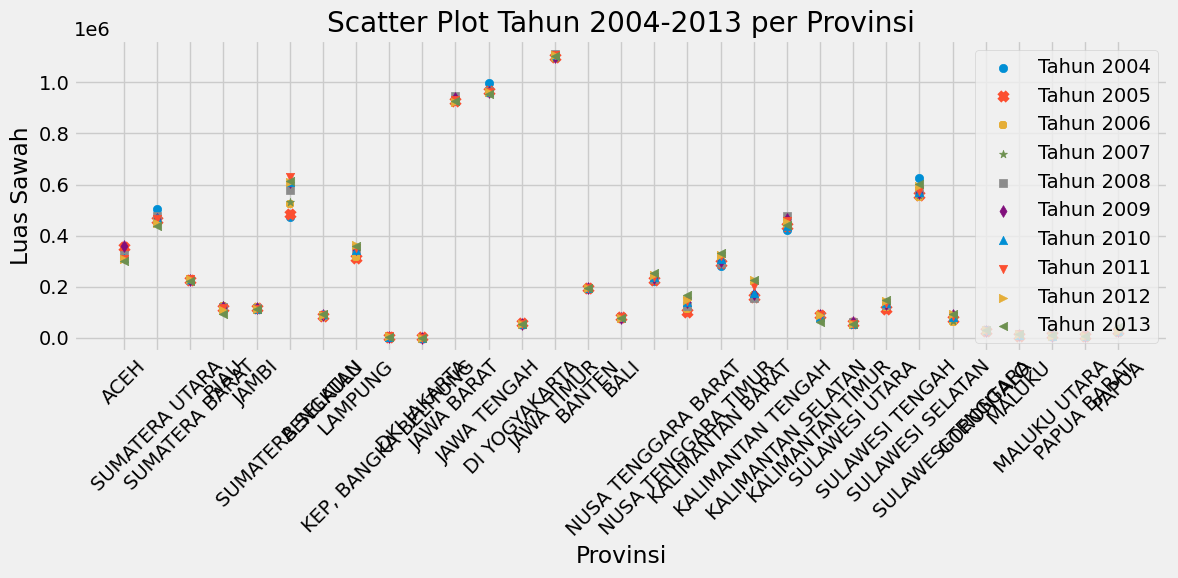

In [ ]:
# Ambil data Provinsi dan tahun 2004 hingga 2013
provinsi = data['Provinsi']
tahun2004 = data['Tahun 2004']
tahun2005 = data['Tahun 2005']
tahun2006 = data['Tahun 2006']
tahun2007 = data['Tahun 2007']
tahun2008 = data['Tahun 2008']
tahun2009 = data['Tahun 2009']
tahun2010 = data['Tahun 2010']
tahun2011 = data['Tahun 2011']
tahun2012 = data['Tahun 2012']
tahun2013 = data['Tahun 2013']

# Atur ukuran gambar (figure size)
plt.figure(figsize=(12, 6))  # Ukuran gambar 12 x 6 inci

# Buat scatter plot untuk tahun 2004
plt.scatter(provinsi, tahun2004, label='Tahun 2004', marker='o')

# Tambahkan data untuk tahun 2005 hingga 2013
plt.scatter(provinsi, tahun2005, label='Tahun 2005', marker='x')
plt.scatter(provinsi, tahun2006, label='Tahun 2006', marker='+')
plt.scatter(provinsi, tahun2007, label='Tahun 2007', marker='*')
plt.scatter(provinsi, tahun2008, label='Tahun 2008', marker='s')
plt.scatter(provinsi, tahun2009, label='Tahun 2009', marker='d')
plt.scatter(provinsi, tahun2010, label='Tahun 2010', marker='^')
plt.scatter(provinsi, tahun2011, label='Tahun 2011', marker='v')
plt.scatter(provinsi, tahun2012, label='Tahun 2012', marker='>')
plt.scatter(provinsi, tahun2013, label='Tahun 2013', marker='<')

# Konfigurasi plot
plt.xlabel('Provinsi')
plt.ylabel('Luas Sawah')
plt.title('Scatter Plot Tahun 2004-2013 per Provinsi')
plt.legend()
plt.xticks(rotation=45)  # Rotasi label sumbu x untuk meningkatkan kejelasan
plt.grid(True)

# Tampilkan plot
plt.tight_layout()
plt.show()

<Axes: >

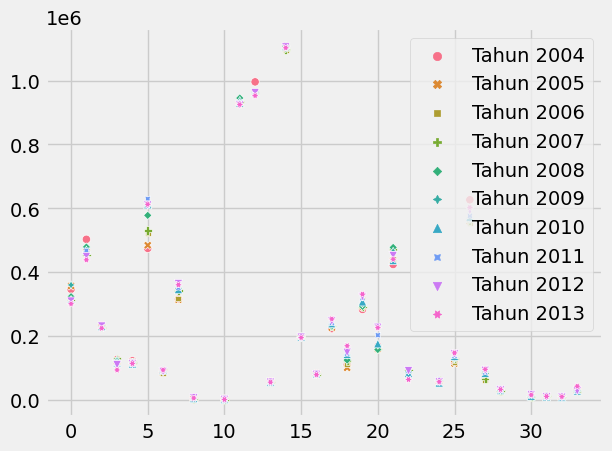

In [ ]:
sns.scatterplot(data = dataa)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalarModel = MinMaxScaler()
data_cluster = scalarModel.fit_transform(dataa)
data_cluster

array([[0.31085424, 0.32290927, 0.28658199, 0.28446374, 0.29060538,
        0.32614877, 0.28241154, 0.27724949, 0.27882149, 0.27214694],
       [0.45241174, 0.41949362, 0.41919137, 0.41278979, 0.4310371 ,
        0.42121364, 0.42262858, 0.42162173, 0.40534281, 0.39695161],
       [0.20743029, 0.20597829, 0.20821945, 0.20645789, 0.2026616 ,
        0.20645919, 0.20649949, 0.20840891, 0.20802518, 0.202615  ],
       [0.11159633, 0.10656972, 0.1128014 , 0.1159772 , 0.10931678,
        0.1105456 , 0.10366431, 0.10385751, 0.09830619, 0.08388459],
       [0.10812373, 0.10522905, 0.10755671, 0.10621003, 0.10385975,
        0.10563157, 0.10047524, 0.10192147, 0.10174107, 0.10222173],
       [0.42671989, 0.43900745, 0.4771231 , 0.48293006, 0.52070838,
        0.55476748, 0.55162193, 0.56837783, 0.55163963, 0.5549134 ],
       [0.07512945, 0.07490434, 0.0752676 , 0.08451577, 0.07950673,
        0.08041375, 0.08288154, 0.08062507, 0.07955826, 0.08392452],
       [0.28346407, 0.28374691, 0.2885326

**FUZZY C-MEANS**

In [ ]:
pip install fuzzy_c_means

**SILHOUTTE INDEX**

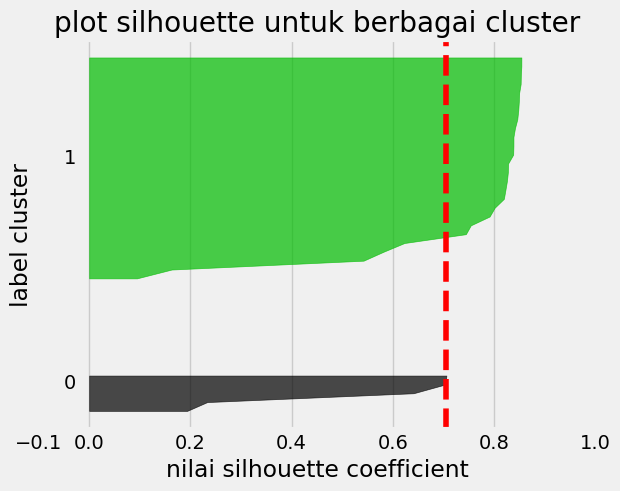

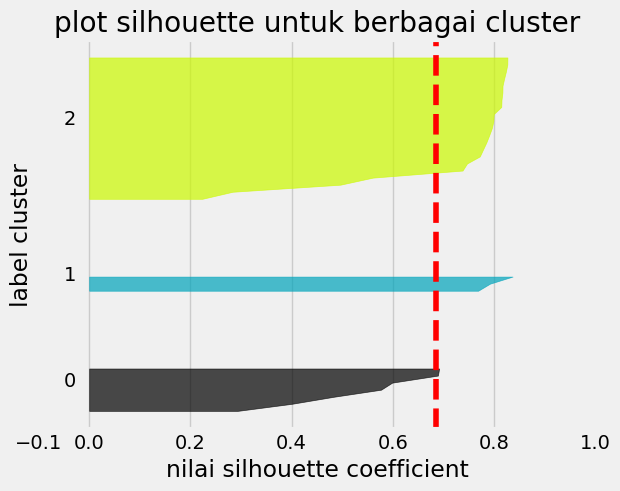

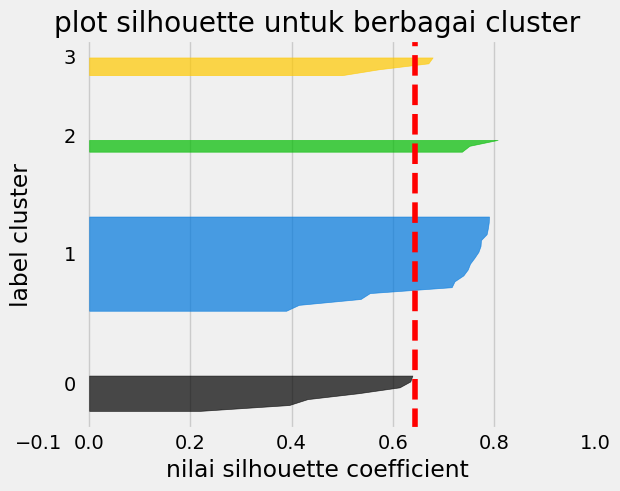

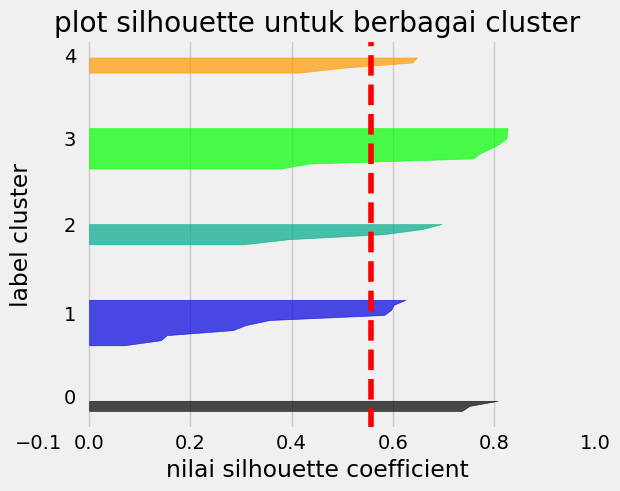

In [ ]:
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples

n_clusters_range = range(2, 6)
# List untuk menyimpan rataan silhouette
silhouette_avg_n_clusters = []

# Iterasi melalui jumlah cluster yang berbeda
for n_clusters in n_clusters_range:
    # Inisialisasi FCM
    fcm = FCM(n_clusters=n_clusters, max_iter=max_iter, m=w, error=error_tol, random_state=random_state)

    # Pelatihan model FCM
    fcm.fit(data_cluster)

    # Prediksi cluster
    pred_labels = fcm.predict(data_cluster)

    # Menghitung nilai rataan silhouette
    silhouette_avg = silhouette_score(data_cluster, pred_labels)
    silhouette_avg_n_clusters.append(silhouette_avg)

    # Menghitung silhouette values untuk setiap sampel
    silhouette_values = silhouette_samples(data_cluster, pred_labels)

    # Plot hasil
    plt.style.use("fivethirtyeight")
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_title("plot silhouette untuk berbagai cluster")
    ax1.set_xlabel("nilai silhouette coefficient")
    ax1.set_ylabel("label cluster")

    y_lower = 10

    for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_values[pred_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1.0])

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.show()


Jumlah Cluster: 2, Rataan Silhouette Score: 0.7048800287856334
Jumlah Cluster: 3, Rataan Silhouette Score: 0.6854728789239317
Jumlah Cluster: 4, Rataan Silhouette Score: 0.6444839850549156
Jumlah Cluster: 5, Rataan Silhouette Score: 0.5573891963244868


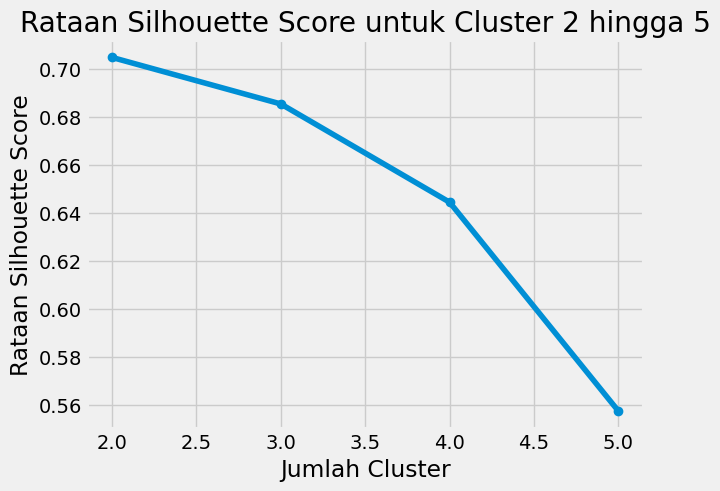

In [ ]:

# Cetak nilai rataan silhouette untuk setiap jumlah cluster
for n_clusters, silhouette_avg in zip(n_clusters_range, silhouette_avg_n_clusters):
    print(f"Jumlah Cluster: {n_clusters}, Rataan Silhouette Score: {silhouette_avg}")

# Line plot untuk nilai rataan silhouette
plt.plot(n_clusters_range, silhouette_avg_n_clusters, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Rataan Silhouette Score')
plt.title('Rataan Silhouette Score untuk Cluster 2 hingga 5')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
from fcmeans import FCM
import matplotlib.pyplot as plt

# Menentukan parameter FCM
n_clusters = 2  # Jumlah cluster
max_iter = 100  # Maksimum iterasi
w = 2.0  # Pembobot (biasanya 2.0)
error_tol = 1e-5  # Toleransi kesalahan
random_state = 42  # Seed untuk inisialisasi matriks rand U

# Inisialisasi FCM
fcm = FCM(n_clusters=n_clusters, max_iter=max_iter, m=w, error=error_tol, random_state=random_state)

# Pelatihan model FCM
latih = fcm.fit(data_cluster)

# Menampilkan hasil
print("Hasil prediksi:")
pred_labels = fcm.predict(data_cluster)
print(pred_labels)

# Matriks Cluster
cluster_centers = fcm.centers
print("Pusat Cluster: ", cluster_centers)

Hasil prediksi:
[1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1]
Pusat Cluster:  [[0.74817791 0.73610679 0.74206468 0.74619938 0.75022012 0.75457919
  0.74982378 0.75337472 0.75155176 0.75192892]
 [0.10716347 0.10683734 0.1088392  0.11004886 0.11006435 0.11361066
  0.1109268  0.11359749 0.11557974 0.11565247]]


In [ ]:
data['cluster'] = pred_labels
data

,Provinsi,Tahun 2004,Tahun 2005,Tahun 2006,Tahun 2007,Tahun 2008,Tahun 2009,Tahun 2010,Tahun 2011,Tahun 2012,Tahun 2013,cluster
0,ACEH,346305.0,356649.0,315277.0,312803.0,323010.0,359751.0,313649.0,307556.0,308973.0,300808,1
1,SUMATERA UTARA,502839.0,462767.0,460486.0,453372.0,478521.0,464256.0,468724.0,467138.0,448722.0,438346,1
2,SUMATERA BARAT,231939.0,228176.0,229469.0,227355.0,225623.0,228176.0,229693.0,231463.0,230775.0,224182,1
3,RIAU,125966.0,118955.0,124985.0,128242.0,122255.0,122738.0,115961.0,115897.0,109585.0,93338,1
4,JAMBI,122126.0,117482.0,119242.0,117543.0,116212.0,117336.0,112434.0,113757.0,113379.0,113546,1
5,SUMATERA SELATAN,474429.0,484207.0,523922.0,530204.0,577821.0,611072.0,611386.0,629355.0,610314.0,612424,0
6,BENGKULU,85641.0,84164.0,83885.0,93779.0,89244.0,89614.0,92976.0,90217.0,88877.0,93382,1
7,LAMPUNG,316017.0,313621.0,317413.0,342507.0,348732.0,349144.0,345437.0,350949.0,364111.0,360237,1
8,"KEP, BANGKA BELITUNG",3773.0,4111.0,4048.0,4176.0,3506.0,5017.0,4056.0,5932.0,6133.0,5358,1
10,DKI JAKARTA,2563.0,1866.0,1466.0,1200.0,1200.0,1215.0,1312.0,1098.0,1001.0,895,1


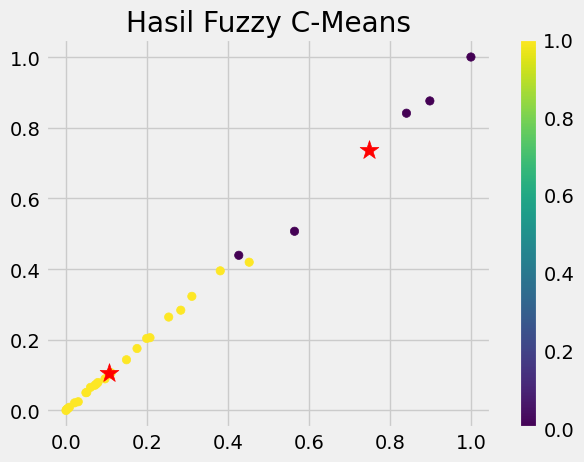

In [ ]:
# Menampilkan grafik
output = plt.scatter(data_cluster[:, 0], data_cluster[:, 1], c=pred_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="*", color='red', s=200)
plt.title('Hasil Fuzzy C-Means')
plt.colorbar(output)
plt.show()

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Baca data geometri provinsi Indonesia (shapefile)
shapefile_path = 'path_to_province_shapefile.shp'
gdf = gpd.read_file(shapefile_path)

# Baca data CSV yang berisi kolom "nama provinsi" dan "cluster"
csv_path = 'path_to_your_csv_file.csv'
data = pd.read_csv(csv_path)

# Gabungkan data geometri dengan data CSV berdasarkan kolom "nama provinsi"
merged_data = gdf.set_index('nama_provinsi').join(data.set_index('nama_provinsi'))

# Plot peta dengan warna berdasarkan kolom "cluster"
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
merged_data.plot(column='cluster', cmap='RdYlBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Atur judul dan tampilan peta
ax.set_title('Peta Provinsi di Indonesia dengan Warna Berdasarkan Kluster')
ax.axis('off')

# Tampilkan peta
plt.show()


ERROR:fiona._env:path_to_province_shapefile.shp: No such file or directory


DriverError: ignored

Hasil prediksi:
[0 2 0 2 1 1 2 1 0 2 1 0 0 0 1 0 0 1 2 2 1 1 2 0 1 1 2 2 2 0 1]
Centroids:
[[ 2.68409629 -7.43930165 -3.77602205 -2.46782765 -1.13837346  5.66957836
  -5.76425178  0.62756367  1.83330722 -9.61032083]
 [-2.53446499  8.91858476  4.65438156  1.68310921 -7.24217178 -6.6077108
  -8.94609088  7.26416417  1.71901622  4.47834225]
 [-9.57486209  9.52904586  6.45581807 -5.42808423 -6.24902716 -6.16132085
  -3.85977569  0.35840629 -1.17431044 -3.77986163]]


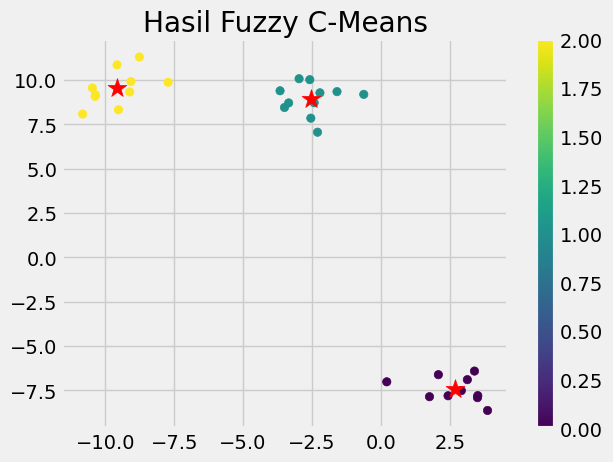

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from fcmeans import FCM
import matplotlib.pyplot as plt

# Membuat data dummy dengan jumlah cluster 3
n_samples = 31  # Jumlah total data
n_features = 10  # Jumlah fitur (sesuaikan dengan tahun 2004-2013)
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=3, random_state=42)

# Menentukan parameter FCM
n_clusters = 3  # Jumlah cluster
max_iter = 100  # Maksimum iterasi
m = 2.0  # Pembobot (biasanya 2.0)
error_tol = 1e-5  # Toleransi kesalahan
random_state = 42  # Seed untuk inisialisasi matriks rand U

# Inisialisasi FCM
fcm = FCM(n_clusters=n_clusters, max_iter=max_iter, m=m, error=error_tol, random_state=random_state)

# Pelatihan model FCM
fcm.fit(X)

# Menampilkan hasil
print("Hasil prediksi:")
pred_labels = fcm.predict(X)
print(pred_labels)

# Matriks Cluster
cluster_centers = fcm.centers
print("Centroids:")
print(cluster_centers)

# Menampilkan grafik
output = plt.scatter(X[:, 0], X[:, 1], c=pred_labels, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker="*", color='red', s=200)
plt.title('Hasil Fuzzy C-Means')
plt.colorbar(output)
plt.show()

In [ ]:
pip install fuzzy_c_means

In [ ]:
from fcmeans import FCM
fcmModel = FCM(n_clusters = 2)
fcmModel.fit(data_cluster)
center = fcmModel.centers
center

array([[0.10716355, 0.10683742, 0.10883927, 0.11004894, 0.11006443,
        0.11361074, 0.11092687, 0.11359756, 0.11557981, 0.11565255],
       [0.74817839, 0.73610728, 0.74206516, 0.74619986, 0.75022058,
        0.75457964, 0.74982423, 0.75337516, 0.7515522 , 0.75192936]])

In [ ]:
K = 5
m = 3

U = np.random.rand(dataa.shape[0],K)
U/=np.sum(U, axis=1)[:,np.newaxis]
U

array([[0.31930845, 0.31655556, 0.02763359, 0.21795829, 0.11854411],
       [0.20712255, 0.21805596, 0.20286158, 0.20750134, 0.16445857],
       [0.31741362, 0.35675205, 0.00763153, 0.17097001, 0.14723278],
       [0.23727952, 0.21949418, 0.0744206 , 0.22389195, 0.24491375],
       [0.26707005, 0.29485775, 0.10928274, 0.0698581 , 0.25893136],
       [0.35261086, 0.23335579, 0.17290744, 0.15248365, 0.08864227],
       [0.16653955, 0.13620431, 0.07588019, 0.28777905, 0.3335969 ],
       [0.19830986, 0.27860788, 0.28032165, 0.20618331, 0.03657729],
       [0.14003218, 0.16737393, 0.12885158, 0.28264386, 0.28109844],
       [0.11395432, 0.16757622, 0.32922703, 0.21060834, 0.1786341 ],
       [0.18511107, 0.01692696, 0.3335936 , 0.04767949, 0.41668888],
       [0.22832216, 0.21061538, 0.23277629, 0.0866613 , 0.24162488],
       [0.19747667, 0.09560953, 0.2363158 , 0.25895099, 0.21164702],
       [0.0629681 , 0.37122424, 0.1162227 , 0.38366203, 0.06592294],
       [0.01000945, 0.1480739 , 0.

In [ ]:
def chitung_cetroid(data,K,U,m):
  centroids = np.zeros((K,data.shape[1]))
  for i in range (K):
    centroids[i,:] = np.sum((U[:,0]**m)[:,np.newaxis]*dataa,axis=0)/np.sum(U[:,i]**m)
  return centroids

In [ ]:
U_new = np.zeros((data.shape[0],K))
for i in range (K):
  U_new[:,i] = np.linalg.norm(dataa~centroids[i,:],axis=1)
U_new = 1/(U_new**(2/(m-1))*np.sum((1/U_new)**(2/(m-1)), axis=1)[:,np.newaxis])
U_new

SyntaxError: ignored